# Hotel Booking Cancellation 

### Importing Libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

### Loading Raw Data:

In [2]:
df = pd.read_csv("C:/Users/Prachi Priya/Downloads/hotel_bookings 2.csv")

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.shape

(119390, 32)

In [5]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [7]:
df.describe() #Summary Statistic of numerical columns

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [8]:
# describe() is not only applicable for numerical data, if you want describe for object datatype then code like this--

df.describe(include='object')  #Summary statistic of objecct columns only

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [9]:
for i in df.describe(include='object').columns:
    print(i)
    print(df[i].unique())
    print("----------------------------------------------------------")
    print("----------------------------------------------------------")

hotel
['Resort Hotel' 'City Hotel']
----------------------------------------------------------
----------------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
----------------------------------------------------------
----------------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
----------------------------------------------------------
----------------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'G

In [10]:
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

### Data Cleaning:

In [11]:
df["reservation_status_date"] = pd.to_datetime(df["reservation_status_date"], format="%d/%m/%Y")

In [12]:
df["reservation_status_date"].dtypes

dtype('<M8[ns]')

In [13]:
df.drop(columns=["agent", "company"], inplace=True)

In [14]:
df["country"].dropna(inplace = True)

In [15]:
df.shape

(119390, 30)

In [16]:
df.dropna(inplace= True)

In [17]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

<Axes: >

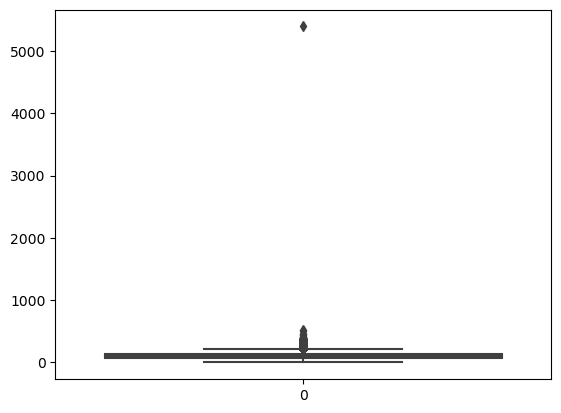

In [18]:
sns.boxplot(df["adr"])   # df["adr"].plot(kind="box")

In [19]:
df = df[df["adr"]<5000] #Removed outliers

## Data Analysis:

### Percentage of cancellation:

In [20]:
df["is_canceled"].value_counts()

is_canceled
0    74745
1    44152
Name: count, dtype: int64

In [21]:
df["is_canceled"].mean() * 100 

37.134662775343365

In [22]:
df["is_canceled"].value_counts (normalize=True)*100  #normalize = True krne pr wo percentage value deta hai..

is_canceled
0    62.865337
1    37.134663
Name: proportion, dtype: float64

In [23]:
(df["is_canceled"]==1).sum()/len(df)*100

37.134662775343365

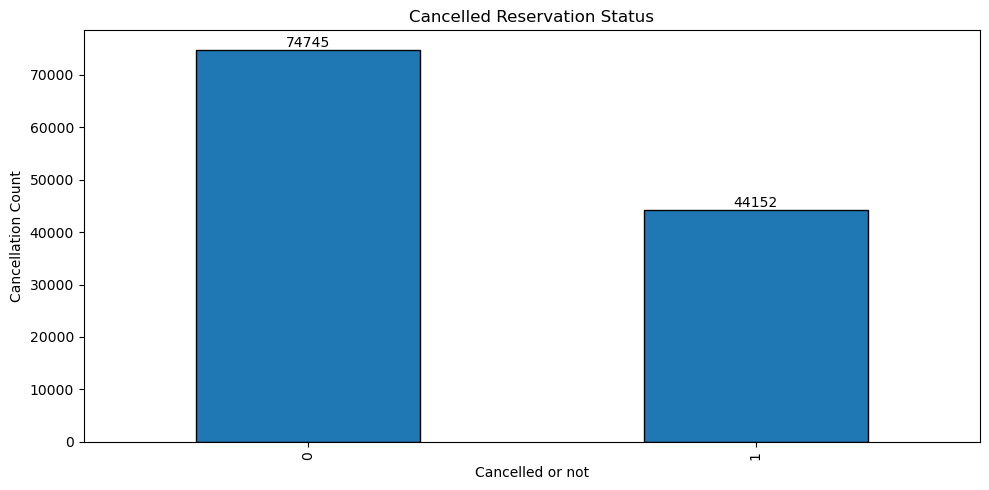

In [24]:
plt.figure(figsize= (10,5))

bar = df["is_canceled"].value_counts().plot(kind="bar", edgecolor="k")

for containers in bar.containers:
    bar.bar_label(containers, fmt="%.0f")

plt.ylabel("Cancellation Count")
plt.xlabel("Cancelled or not")
plt.title("Cancelled Reservation Status")

plt.tight_layout()
plt.show()

In [25]:
cancelled = df.groupby("is_canceled")["is_canceled"].count()
cancelled

is_canceled
0    74745
1    44152
Name: is_canceled, dtype: int64

In [26]:
# fig = px.pie(cancelled, names=cancelled.index, values=cancelled.values, hole=0.4, title= "Cancelled Reservation Status")
# fig.update_traces(textinfo="percent+label", pull = [0.05,0])

In [27]:
df["hotel"].value_counts()

hotel
City Hotel      79301
Resort Hotel    39596
Name: count, dtype: int64

In [28]:
df["hotel"].value_counts(normalize = True)*100

hotel
City Hotel      66.697225
Resort Hotel    33.302775
Name: proportion, dtype: float64

In [29]:
hotel_cancelled = df.groupby("hotel")["is_canceled"].count()
hotel_cancelled

hotel
City Hotel      79301
Resort Hotel    39596
Name: is_canceled, dtype: int64

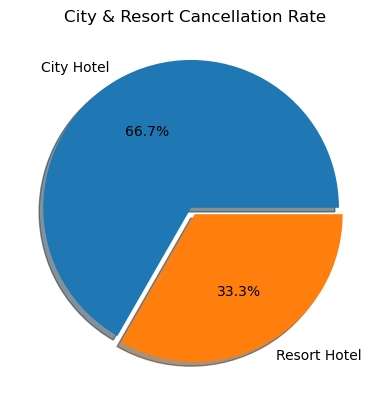

In [30]:
plt.pie(hotel_cancelled, labels=hotel_cancelled.index, autopct="%1.1f%%", explode = [0.05, 0], shadow = True)

plt.title("City & Resort Cancellation Rate")
plt.show()

In [31]:
df.groupby(["hotel", "is_canceled"])["is_canceled"].count()

hotel         is_canceled
City Hotel    0              46226
              1              33075
Resort Hotel  0              28519
              1              11077
Name: is_canceled, dtype: int64

In [32]:
# plt.figure(figsize=[10,5])

# sns.countplot(df, x="hotel", hue="is_canceled")

# plt.title("Reservation Status in Resort and City Hotel")
# plt.show()

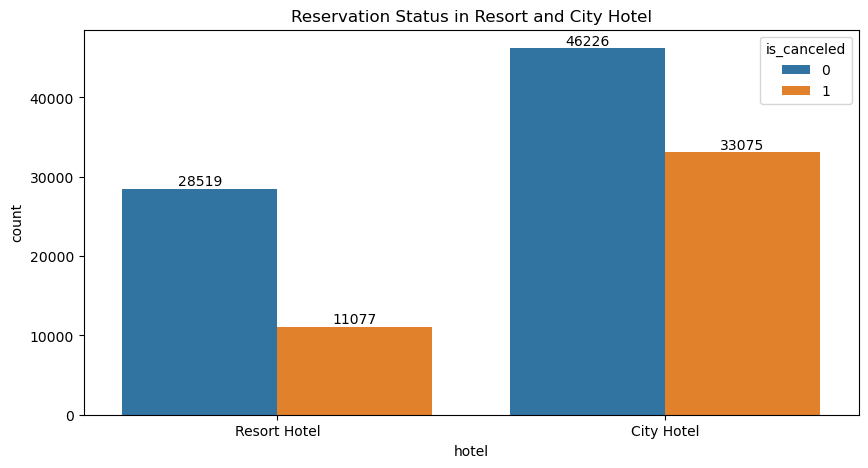

In [33]:
plt.figure(figsize=[10,5])

fig = sns.countplot(df, x="hotel", hue="is_canceled")

for containers in fig.containers:
    fig.bar_label(containers, fmt="%.0f")

plt.title("Reservation Status in Resort and City Hotel")
plt.show()

### Cancellation rate in resort hotel:

In [34]:
Resort_Hotel = df[df["hotel"]=="Resort Hotel"]

In [35]:
Resort_Hotel["is_canceled"].value_counts()

is_canceled
0    28519
1    11077
Name: count, dtype: int64

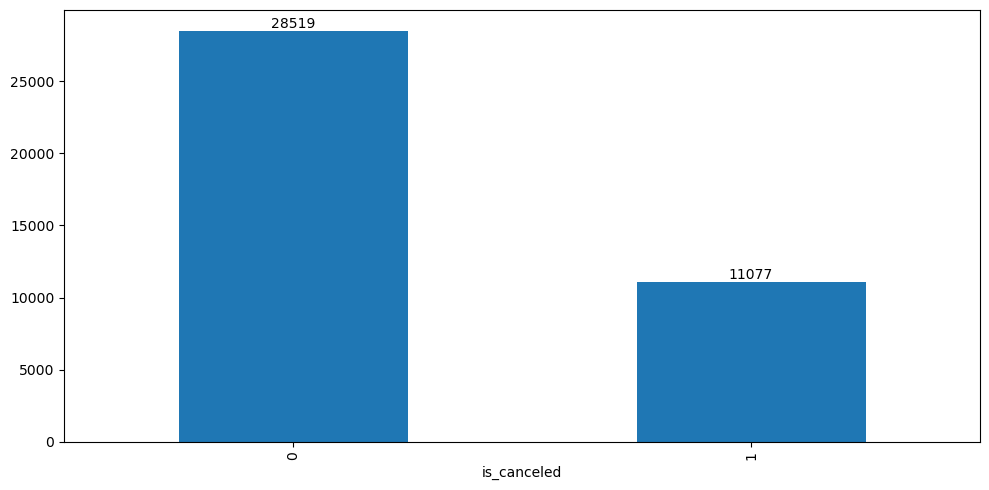

In [36]:
plt.figure(figsize=(10,5))

bars = Resort_Hotel["is_canceled"].value_counts().plot(kind="bar")

for containers in bars.containers:
    bars.bar_label(containers, fmt = "%.0f")
    
plt.tight_layout()

### Cancellation rate in city hotel:

In [37]:
City_Hotel = df[df["hotel"]=="City Hotel"]

In [38]:
City_Hotel["is_canceled"].value_counts()

is_canceled
0    46226
1    33075
Name: count, dtype: int64

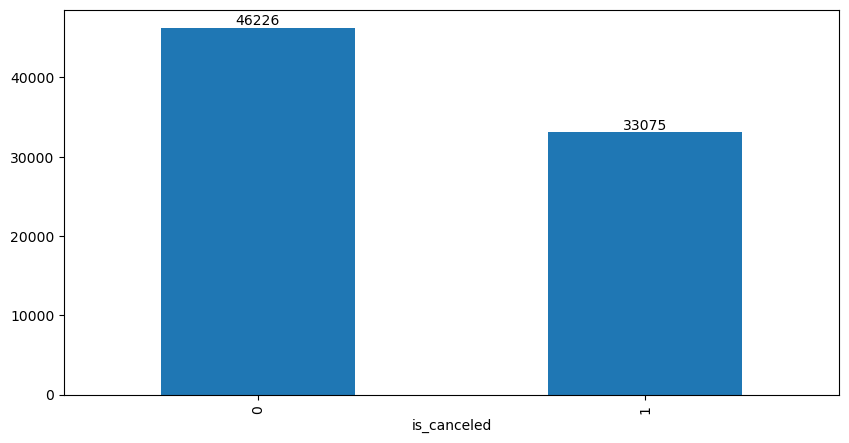

In [39]:
plt.figure(figsize=(10,5))

bars = City_Hotel["is_canceled"].value_counts().plot(kind="bar")

for containers in bars.containers:
    bars.bar_label(containers, fmt="%.0f")

    plt.show()

### Effects of Price on Cancellation:

In [40]:
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [41]:
RH = Resort_Hotel.groupby("reservation_status_date")["adr"].mean()
CH = City_Hotel.groupby("reservation_status_date")["adr"].mean()

In [43]:
RH

reservation_status_date
2014-11-18      0.000000
2015-01-01     61.966667
2015-01-02      9.633750
2015-01-18      0.000000
2015-01-21     37.301209
                 ...    
2017-09-08    101.012500
2017-09-09    147.778333
2017-09-10    145.272500
2017-09-12    153.570000
2017-09-14    105.930000
Name: adr, Length: 913, dtype: float64

In [44]:
CH

reservation_status_date
2014-10-17     62.800000
2015-01-01     62.063158
2015-01-20     76.500000
2015-01-30     61.400000
2015-02-17     76.500000
                 ...    
2017-09-03    137.172600
2017-09-04    116.925385
2017-09-05    154.000000
2017-09-06     93.293333
2017-09-07    159.685000
Name: adr, Length: 864, dtype: float64

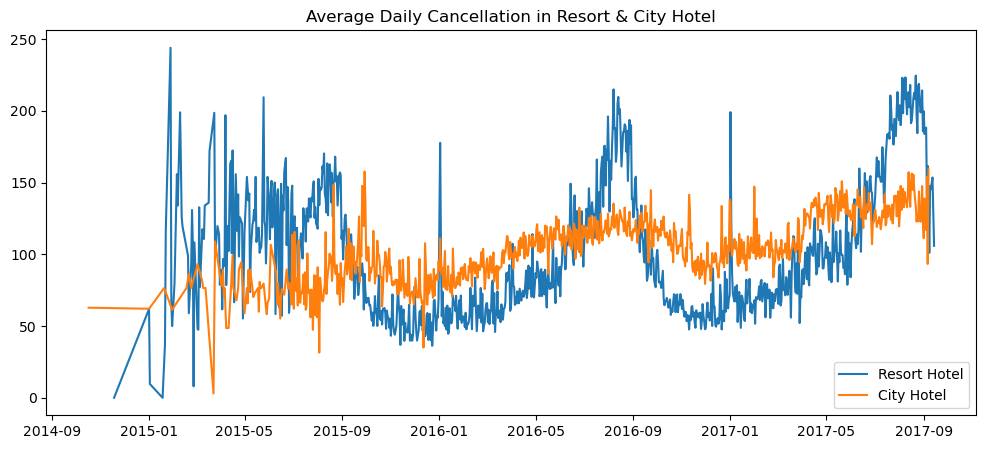

In [54]:
plt.figure(figsize = [12,5])

plt.plot(RH.index, RH.values, label="Resort Hotel")
plt.plot(CH.index, CH.values, label="City Hotel")

plt.title("Average Daily Cancellation in Resort & City Hotel")

plt.legend()
plt.show()

#### Conclusion: Price of City Hotel is lesser than Resort Hotel!!

### Monthly cancellation Rate:

In [67]:
month = df["reservation_status_date"].dt.month_name()

resort_month_wise_cancellation = Resort_Hotel.groupby(month)["is_canceled"].sum()
resort_month_wise_cancellation

reservation_status_date
April         971
August        773
December      769
February     1041
January      1333
July         1059
June         1089
March        1154
May           865
November      647
October       777
September     599
Name: is_canceled, dtype: int64

In [68]:
city_month_wise_cancellation = City_Hotel.groupby(month)["is_canceled"].sum()
city_month_wise_cancellation

reservation_status_date
April        2493
August       1911
December     2750
February     3310
January      4727
July         3301
June         1812
March        2664
May          2273
November     2411
October      3364
September    2059
Name: is_canceled, dtype: int64

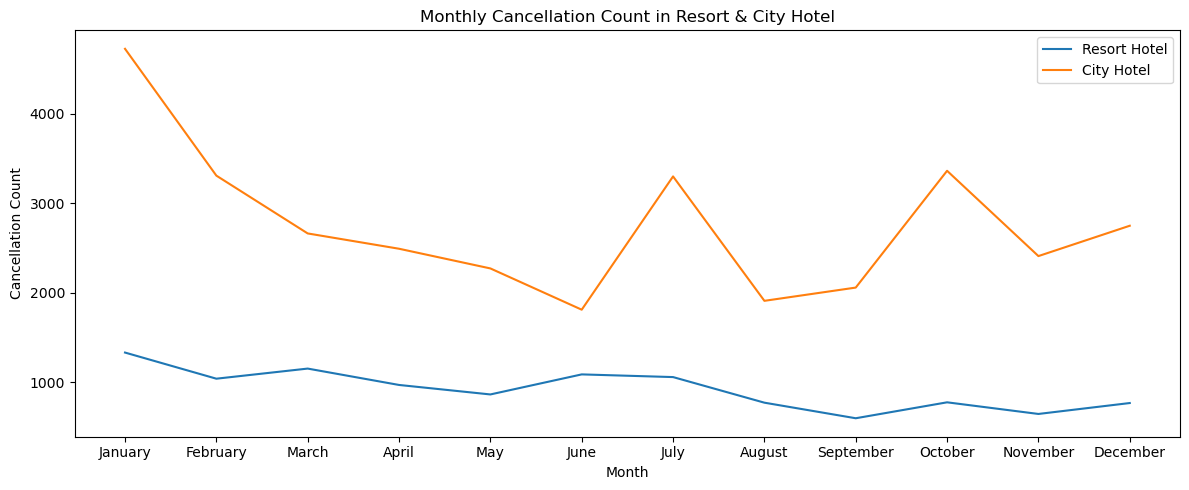

In [70]:
plt.figure(figsize=[12,5])

correct_order = ["January", "February", "March", "April", "May", "June", "July", 
                 "August", "September", "October", "November", "December"]

resort_month_wise_cancellation = resort_month_wise_cancellation.apply(correct_order)
city_month_wise_cancellation = city_month_wise_cancellation.apply(correct_order)

plt.plot(resort_month_wise_cancellation.index, resort_month_wise_cancellation.values, label="Resort Hotel")
plt.plot(city_month_wise_cancellation.index, city_month_wise_cancellation.values, label = "City Hotel")

plt.legend()
plt.xlabel("Month")
plt.ylabel("Cancellation Count")
plt.title("Monthly Cancellation Count in Resort & City Hotel")

plt.tight_layout()
plt.show()

### Country wise Cancellation Count:

In [71]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [74]:
df["country"].unique()

array(['PRT', 'GBR', 'USA', 'ESP', 'IRL', 'FRA', 'ROU', 'NOR', 'OMN',
       'ARG', 'POL', 'DEU', 'BEL', 'CHE', 'CN', 'GRC', 'ITA', 'NLD',
       'DNK', 'RUS', 'SWE', 'AUS', 'EST', 'CZE', 'BRA', 'FIN', 'MOZ',
       'BWA', 'LUX', 'SVN', 'ALB', 'IND', 'CHN', 'MEX', 'MAR', 'UKR',
       'SMR', 'LVA', 'PRI', 'SRB', 'CHL', 'AUT', 'BLR', 'LTU', 'TUR',
       'ZAF', 'AGO', 'ISR', 'CYM', 'ZMB', 'CPV', 'ZWE', 'DZA', 'KOR',
       'CRI', 'HUN', 'ARE', 'TUN', 'JAM', 'HRV', 'HKG', 'IRN', 'GEO',
       'AND', 'GIB', 'URY', 'JEY', 'CAF', 'CYP', 'COL', 'GGY', 'KWT',
       'NGA', 'MDV', 'VEN', 'SVK', 'FJI', 'KAZ', 'PAK', 'IDN', 'LBN',
       'PHL', 'SEN', 'SYC', 'AZE', 'BHR', 'NZL', 'THA', 'DOM', 'MKD',
       'MYS', 'ARM', 'JPN', 'LKA', 'CUB', 'CMR', 'BIH', 'MUS', 'COM',
       'SUR', 'UGA', 'BGR', 'CIV', 'JOR', 'SYR', 'SGP', 'BDI', 'SAU',
       'VNM', 'PLW', 'QAT', 'EGY', 'PER', 'MLT', 'MWI', 'ECU', 'MDG',
       'ISL', 'UZB', 'NPL', 'BHS', 'MAC', 'TGO', 'TWN', 'DJI', 'STP',
       'KNA', 'ETH', 

In [84]:
Resort_Country = Resort_Hotel.groupby("country")["is_canceled"].sum().sort_values(ascending = False).head(10)
City_Country = City_Hotel.groupby("country")["is_canceled"].sum().sort_values(ascending= False).head(10)

print(Resort_Country)
print("-----------------------------")
print("-----------------------------")
print(City_Country)

country
PRT    7438
GBR     891
ESP     851
IRL     432
FRA     211
DEU     146
CHE     112
BRA     101
CN       96
ITA      80
Name: is_canceled, dtype: int64
-----------------------------
-----------------------------
country
PRT    20076
FRA     1723
GBR     1562
ESP     1326
ITA     1253
DEU     1072
BRA      729
CHN      453
USA      429
BEL      415
Name: is_canceled, dtype: int64


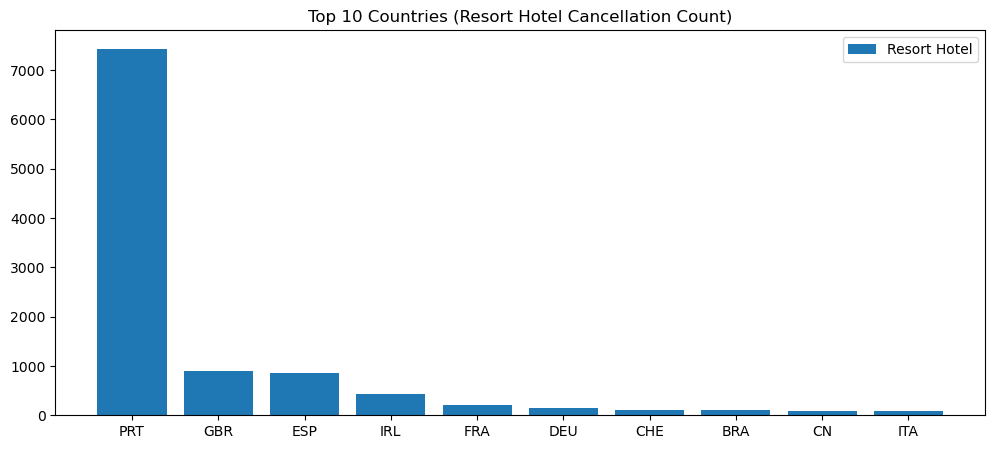

In [94]:
plt.figure(figsize = [12, 5])

plt.bar(Resort_Country.index, Resort_Country.values, label = "Resort Hotel")

plt.title("Top 10 Countries (Resort Hotel Cancellation Count)")
plt.legend()
plt.show()

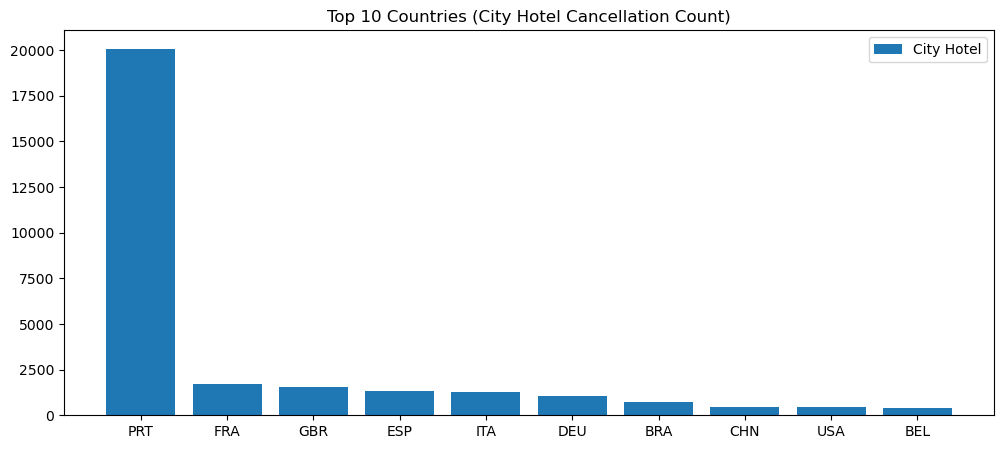

In [95]:
plt.figure(figsize = [12, 5])

plt.bar(City_Country.index, City_Country.values, label= "City Hotel")

plt.title("Top 10 Countries (City Hotel Cancellation Count)")
plt.legend()
plt.show()

In [105]:
count = df.groupby("country")["is_canceled"].sum().sort_values(ascending = False).head(10)
count

country
PRT    27514
GBR     2453
ESP     2177
FRA     1934
ITA     1333
DEU     1218
IRL      832
BRA      830
USA      501
BEL      474
Name: is_canceled, dtype: int64

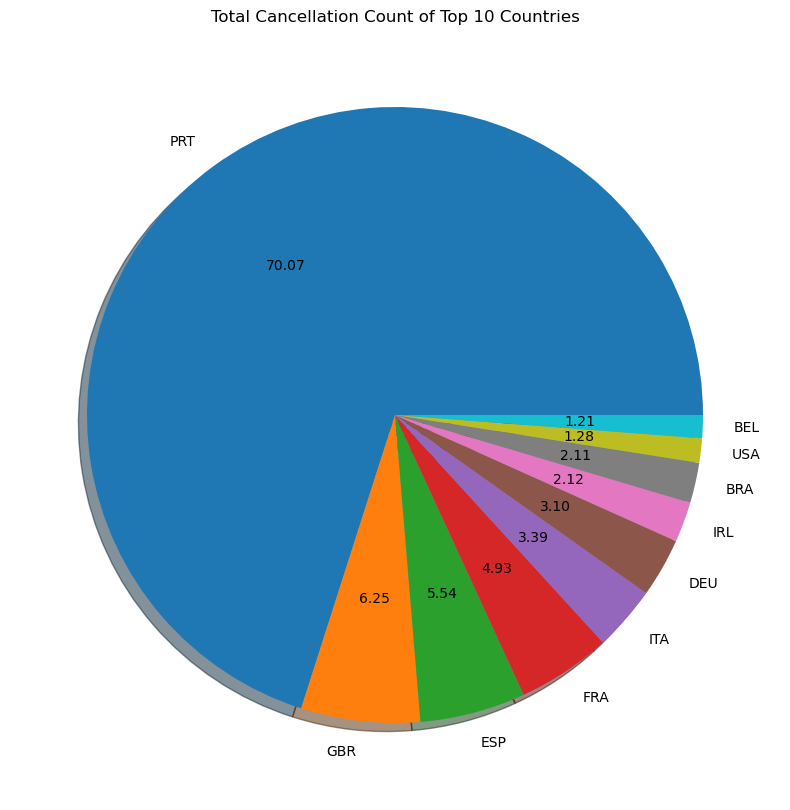

In [114]:
plt.figure(figsize=[10,10])

plt.pie(count, labels = count.index, autopct = "%.2f", shadow = True)

plt.title("Total Cancellation Count of Top 10 Countries")
plt.show()

In [116]:
df["market_segment"].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Aviation'], dtype=object)

In [117]:
df["market_segment"].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [119]:
df["market_segment"].value_counts(normalize = True)* 100  #Percentage Count

market_segment
Online TA        47.437698
Offline TA/TO    20.319268
Groups           16.658116
Direct           10.469566
Corporate         4.298679
Complementary     0.617341
Aviation          0.199332
Name: proportion, dtype: float64